# Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

import pandas as pd

import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

# Load Dataset

In [2]:
df = pd.read_excel( 'Figure-2-Data.xlsx' )

In [3]:
df.columns

Index(['Embryo_Index', 'Birth_Label', 'Image_Only_Predicted_Score',
       'Image_All_ClinicalFeatures_Predicted_Score',
       'Image_All_ClinicalFeatures_Exclude_EM_Predicted_Score'],
      dtype='object')

In [5]:
birth_label = df[ df.columns[1] ].to_numpy()

image_only_score = df[ df.columns[2] ].to_numpy()
image_and_all_clinical_score = df[ df.columns[3] ].to_numpy()

image_and_all_clinical_exclude_em_score = df[ df.columns[4] ].to_numpy()

# Draw AUC Curves

In [6]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr['image_only'], tpr['image_only'], _ = roc_curve(birth_label, image_only_score)
roc_auc['image_only'] = auc( fpr['image_only'], tpr['image_only'] )

fpr['image_and_all_clinical'], tpr['image_and_all_clinical'], _ = roc_curve(birth_label, image_and_all_clinical_score)
roc_auc['image_and_all_clinical'] = auc( fpr['image_and_all_clinical'], tpr['image_and_all_clinical'] )

fpr['image_and_all_clinical_exclude_em'], tpr['image_and_all_clinical_exclude_em'], _ = roc_curve(birth_label, image_and_all_clinical_exclude_em_score)
roc_auc['image_and_all_clinical_exclude_em'] = auc( fpr['image_and_all_clinical_exclude_em'], tpr['image_and_all_clinical_exclude_em'] )

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


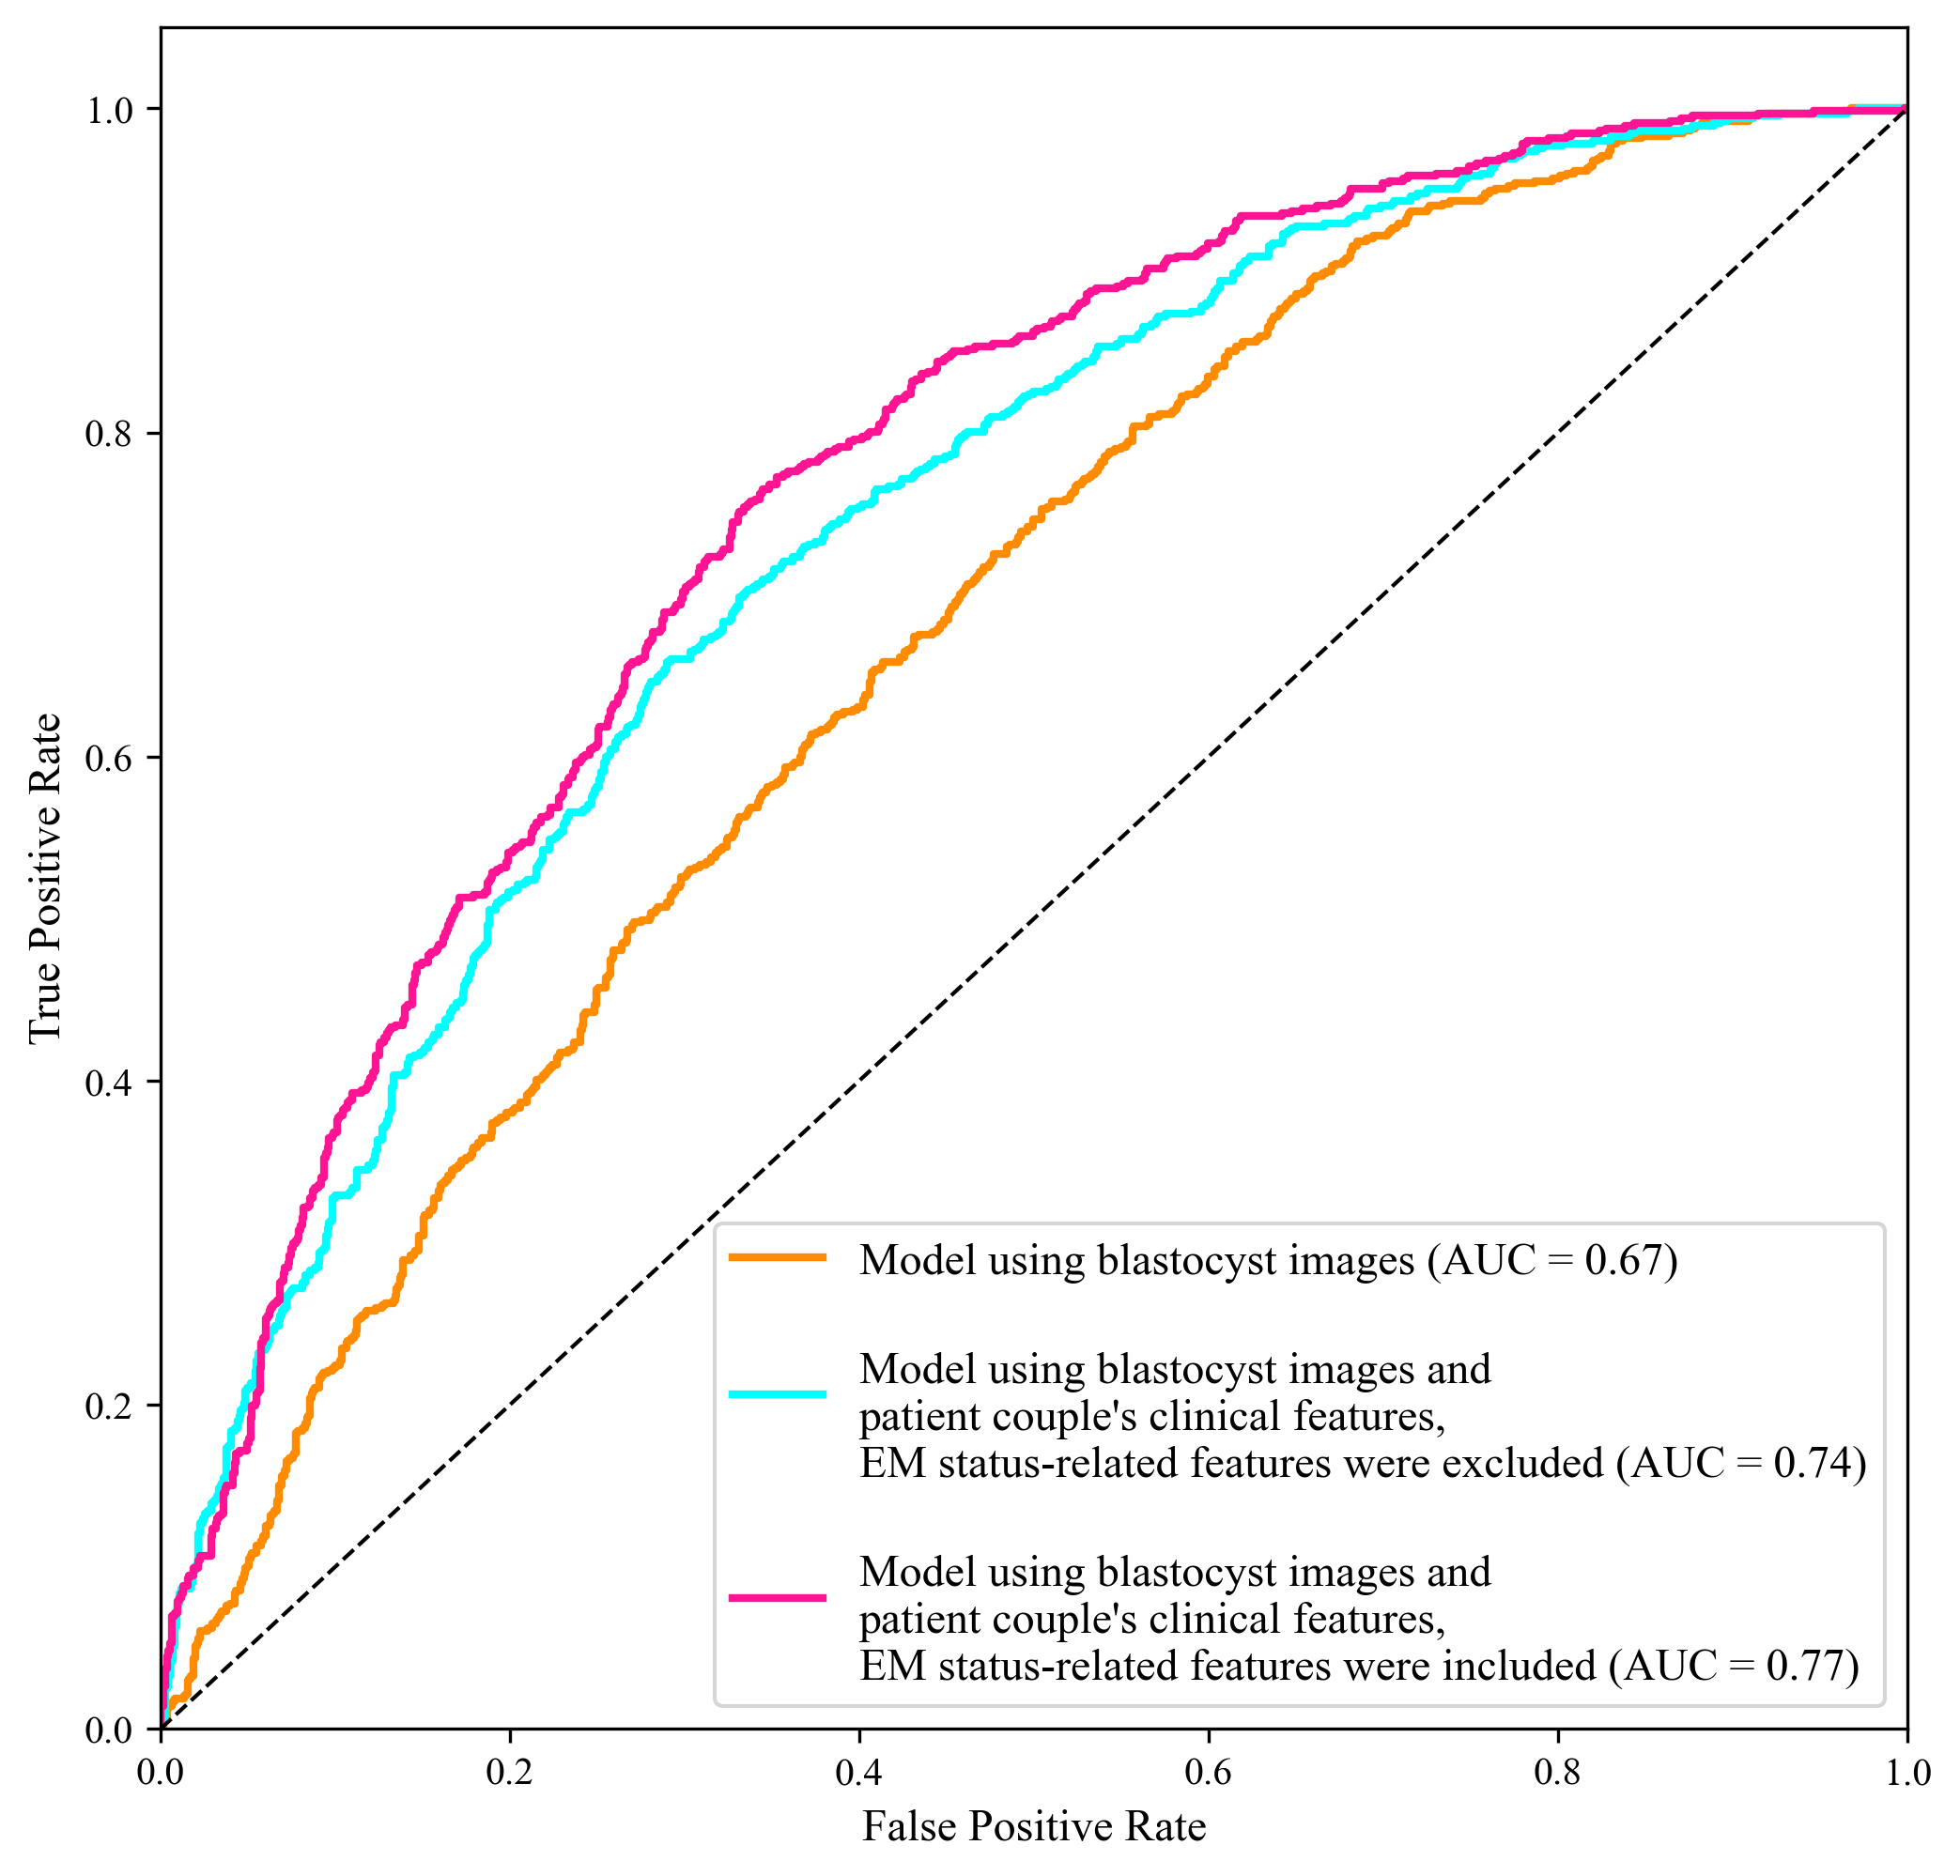

In [10]:
# Plot all ROC curves
plt.figure( figsize=(8, 8), dpi=300 )
plt.plot(
    fpr["image_only"],
    tpr["image_only"],
    label="Model using blastocyst images (AUC = {0:0.2f})".format(roc_auc["image_only"]),
    color="darkorange",
    linewidth=2,
)

plt.plot(
    fpr["image_and_all_clinical_exclude_em"],
    tpr["image_and_all_clinical_exclude_em"],
    label="\nModel using blastocyst images and \npatient couple's clinical features,\nEM status-related features were excluded (AUC = {0:0.2f})".format(roc_auc["image_and_all_clinical_exclude_em"]),
    color="aqua",
    linewidth=2,
)

plt.plot(
    fpr["image_and_all_clinical"],
    tpr["image_and_all_clinical"],
    label="\nModel using blastocyst images and \npatient couple's clinical features,\nEM status-related features were included (AUC = {0:0.2f})".format(roc_auc["image_and_all_clinical"]),
    color="deeppink",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw= 1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize= 11.5)
plt.ylabel("True Positive Rate", fontsize= 11.5)
plt.legend(loc="lower right", fontsize= 11.5)
plt.savefig('Figure-2.eps', format='eps')
plt.show()